In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [94]:
nyc_daily_demand = pd.read_csv("../data/curated/combined_data.csv")

In [62]:
test = nyc_daily_demand[nyc_daily_demand['month'].isin([3,4])]
train = nyc_daily_demand[~(nyc_daily_demand['month'].isin([3,4]))]

In [88]:
nyc_daily_demand.columns

Index(['count', 'pu_location_id', 'year', 'month', 'day_of_month',
       'day_of_week', 'is_weekday', 'service_zone', 'zone', 'borough', 'A',
       'B', 'C', 'V', 'S', 'D', 'K', 'O', 'M', 'G', 'W', 'E', 'N', 'P', 'F',
       'Z', 'U', 'Q', 'H', 'Y', 'I', 'R', 'J', 'T', 'total_lot'],
      dtype='object')

In [31]:
X.columns

Index(['pu_location_id', 'year', 'month', 'day_of_month', 'day_of_week',
       'is_weekday', 'A', 'B', 'C', 'V', 'S', 'D', 'K', 'O', 'M', 'G', 'W',
       'E', 'N', 'P', 'F', 'Z', 'U', 'Q', 'H', 'Y', 'I', 'R', 'J', 'T',
       'total_lot'],
      dtype='object')

In [32]:
cat_col = ['service_zone','zone','borough']

In [71]:
X = train[[col for col in nyc_daily_demand.columns if col not in ['count']+cat_col]]
Y = np.log10(train['count'])
X_test = test[[col for col in nyc_daily_demand.columns if col not in ['count']+cat_col]]
Y_test = np.log10(test['count'])
# RFR=RandomForestRegressor(max_features=14,n_estimators=50, max_depth=50)
# score = cross_val_score(RFR, X, Y, cv=3, scoring='neg_root_mean_squared_error')
# score
# RFR.fit(x_train, y_train)
# mean_squared_error(y_train, RFR.predict(x_train))
# mean_squared_error(y_test, RFR.predict(x_test))

# RFR1=RandomForestRegressor(max_features=14,n_estimators=500)
# RFR1.fit(x_train, y_train)
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_train, RFR1.predict(x_train))
# mean_squared_error(y_test, RFR1.predict(x_test))



In [72]:
RFR= RandomForestRegressor(max_depth=70, max_features='sqrt', n_estimators=50)

In [73]:
RFR.fit(X, Y)

RandomForestRegressor(max_depth=70, max_features='sqrt', n_estimators=50)

In [74]:
y_pred = RFR.predict(X_test)

In [79]:
RFR.feature_importances_

array([0.02376438, 0.00157954, 0.00511751, 0.01238718, 0.00621982,
       0.00192573, 0.04657089, 0.20809781, 0.01268077, 0.0755983 ,
       0.02292363, 0.02594014, 0.01327154, 0.02694111, 0.01208018,
       0.08532934, 0.01053721, 0.03098716, 0.0056549 , 0.01289925,
       0.03403839, 0.01382291, 0.01637128, 0.02215681, 0.05129081,
       0.00565937, 0.00667118, 0.07666951, 0.02241927, 0.0261552 ,
       0.08423885])

<BarContainer object of 31 artists>

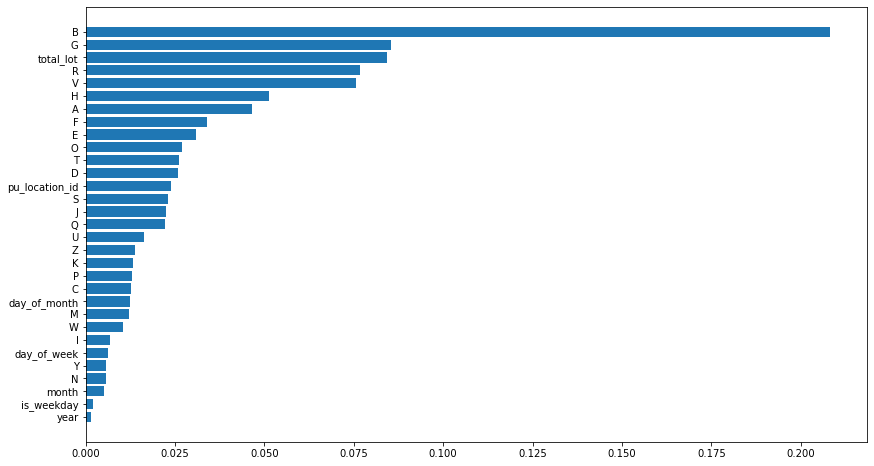

In [86]:
fig, ax = plt.subplots(1, figsize=(14,8))
sorted_idx = RFR.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], RFR.feature_importances_[sorted_idx])


In [75]:
mean_squared_error(Y_test, y_pred)

0.04851510538107486

In [93]:
Y_test

0        0.477121
1        0.000000
4        0.301030
7        0.698970
8        0.602060
           ...   
40772    0.000000
40780    0.000000
40781    0.000000
40794    0.000000
40804    0.000000
Name: count, Length: 12146, dtype: float64

In [77]:
list(np.round(np.power(10,np.column_stack((y_pred,Y_test))) - 1,decimals=0).astype(int))

[array([1, 2]),
 array([2, 0]),
 array([1, 1]),
 array([1, 4]),
 array([1, 3]),
 array([1, 3]),
 array([2, 0]),
 array([1, 2]),
 array([0, 3]),
 array([0, 1]),
 array([1, 3]),
 array([0, 2]),
 array([2, 0]),
 array([0, 3]),
 array([0, 2]),
 array([2, 0]),
 array([2, 3]),
 array([2, 2]),
 array([2, 3]),
 array([1, 1]),
 array([2, 1]),
 array([2, 0]),
 array([1, 1]),
 array([2, 2]),
 array([1, 1]),
 array([1, 3]),
 array([2, 4]),
 array([2, 4]),
 array([3, 2]),
 array([0, 3]),
 array([1, 1]),
 array([1, 1]),
 array([2, 1]),
 array([2, 3]),
 array([1, 3]),
 array([2, 0]),
 array([1, 1]),
 array([4, 1]),
 array([1, 3]),
 array([2, 2]),
 array([2, 1]),
 array([4, 2]),
 array([1, 4]),
 array([4, 2]),
 array([2, 2]),
 array([2, 5]),
 array([1, 0]),
 array([1, 2]),
 array([3, 4]),
 array([2, 3]),
 array([2, 1]),
 array([2, 0]),
 array([1, 4]),
 array([1, 0]),
 array([2, 2]),
 array([2, 3]),
 array([0, 6]),
 array([2, 0]),
 array([1, 0]),
 array([1, 9]),
 array([1928, 2359]),
 array([1957, 1786

In [43]:
RFR.train()

array([-1.88772823, -1.63603507, -1.19160235])

In [39]:
RFR

RandomForestRegressor(max_features=14, n_estimators=300)

In [48]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_, gs.scorer_)
    print("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

In [54]:
parameters = {"n_estimators": [10,50,100],
              "max_features": ["auto",'sqrt','log2'], # ["auto","sqrt","log2"]
              "max_depth": [10,50]}
best = cv_optimize(RFR, parameters, X, Y, n_folds=5, score_func='neg_mean_absolute_error', verbose=3)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=10;, score=-1.416 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=10;, score=-1.558 total time=   1.1s
[CV 3/5] END max_depth=10, max_features=auto, n_estimators=10;, score=-1.416 total time=   1.1s
[CV 4/5] END max_depth=10, max_features=auto, n_estimators=10;, score=-0.810 total time=   1.1s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=10;, score=-1.146 total time=   1.1s
[CV 1/5] END max_depth=10, max_features=auto, n_estimators=50;, score=-1.428 total time=   5.1s
[CV 2/5] END max_depth=10, max_features=auto, n_estimators=50;, score=-1.580 total time=   5.0s
[CV 3/5] END max_depth=10, max_features=auto, n_estimators=50;, score=-1.405 total time=   6.4s
[CV 4/5] END max_depth=10, max_features=auto, n_estimators=50;, score=-0.825 total time=   6.6s
[CV 5/5] END max_depth=10, max_features=auto, n_estimators=50;, score=-1.1

[CV 1/5] END max_depth=50, max_features=log2, n_estimators=100;, score=-1.222 total time=   5.1s
[CV 2/5] END max_depth=50, max_features=log2, n_estimators=100;, score=-1.236 total time=   4.6s
[CV 3/5] END max_depth=50, max_features=log2, n_estimators=100;, score=-1.192 total time=   4.4s
[CV 4/5] END max_depth=50, max_features=log2, n_estimators=100;, score=-0.803 total time=   4.2s
[CV 5/5] END max_depth=50, max_features=log2, n_estimators=100;, score=-1.110 total time=   4.3s
[CV 1/5] END max_depth=70, max_features=auto, n_estimators=10;, score=-1.425 total time=   1.8s
[CV 2/5] END max_depth=70, max_features=auto, n_estimators=10;, score=-1.505 total time=   1.7s
[CV 3/5] END max_depth=70, max_features=auto, n_estimators=10;, score=-1.477 total time=   1.8s
[CV 4/5] END max_depth=70, max_features=auto, n_estimators=10;, score=-0.871 total time=   1.8s
[CV 5/5] END max_depth=70, max_features=auto, n_estimators=10;, score=-1.180 total time=   1.7s
[CV 1/5] END max_depth=70, max_feat

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [53]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we